In [25]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
count=CountVectorizer()

# Load the dataset
data=pd.read_csv("Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [2]:
# Data exploration
print(data.shape)  
print(data.info())  
print(data.describe())  

(40000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB
None
              label
count  40000.000000
mean       0.499525
std        0.500006
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


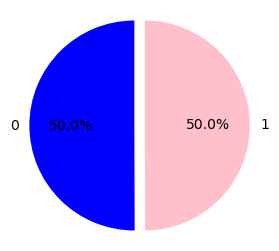

In [10]:
label_counts = data['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

colors = ['blue', 'pink']  
explode = [0.1, 0]  

fig, ax = plt.subplots(figsize=(3, 3))  
ax.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  

plt.show()

In [11]:
import re

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    
    # Remove unwanted characters and punctuation
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    
    # Convert text to lowercase
    text = text.lower()
    
    return text

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

# Download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# Function for text preprocessing
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize text into words
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Perform stemming using PorterStemmer
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Join tokens back into a preprocessed text
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

# Apply text preprocessing to the 'text' column in the DataFrame
data['preprocessed_text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = data['preprocessed_text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)

# Transform the training and testing data
X_train_vectorized = tfidf_vectorizer.transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8925


In [19]:
import pickle

# Save the trained model to a file
model_filename = 'sentiment_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

In [24]:
# Preprocess the input text
input_text = "I really enjoyed watching this movie"
preprocessed_text = preprocess_text(input_text)

# Transform the preprocessed text using the TF-IDF vectorizer
new_text_vectorized = tfidf_vectorizer.transform([preprocessed_text])

# Fit the logistic regression model with training data
model.fit(X_train_vectorized, y_train)

# Make predictions using the trained model
predicted_label = model.predict(new_text_vectorized)

# Print the predicted label
if predicted_label == 0:
    print("Negative sentiment")
else:
    print("Positive sentiment")

Positive sentiment


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1_score = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Precision: 0.8857559552746719
Recall: 0.903321764997521
F1-score: 0.8944526264113893
